# Lesson 4

## Purpose

In this lesson we will look at how to create cyclic models including simulated moving bed

## Load CADETSettings

This imports all the standard libraries, finds CADET and find and creates all the lesson folders.

In [1]:
%run CADETSettings.ipynb

CADET was found. Continue to the next step.


## Add simple cyclic system

Diagram of a single cycle

Connection 0

Inlet (Unit 0) -> Column (Unit 5) -> Column (Unit 6) -> Outlet (Unit 3)

Inlet (Unit 1) -> Column (Unit 4) -> Outlet (Unit 2)

Connection 1

Inlet (Unit 0) -> Column (Unit 6) -> Column (Unit 4) -> Outlet (Unit 3)

Inlet (Unit 1) -> Column (Unit 5) -> Outlet (Unit 2)

Connection 2

Inlet (Unit 0) -> Column (Unit 4) -> Column (Unit 5) -> Outlet (Unit 3)

Inlet (Unit 1) -> Column (Unit 6) -> Outlet (Unit 2)

Lets also turn this into a function so we can increase the number of cycles and see what happens.

CompletedProcess(args=['C:/Users/kosh_000/CADET/cadet/bin/cadet-cli.exe', 'C:/Users/kosh_000/CADET/lessons/lesson_4/example_0_1/example.h5'], returncode=0, stdout=b'', stderr=b'')
Simulation completed successfully


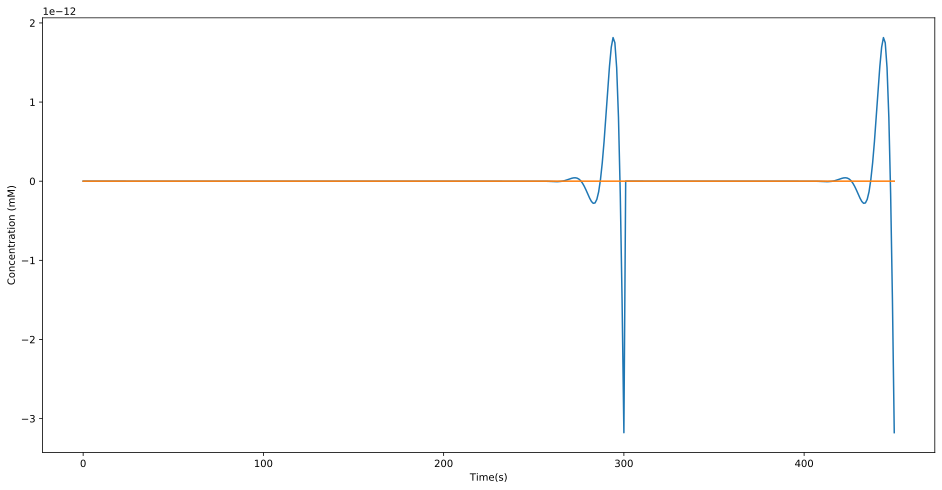

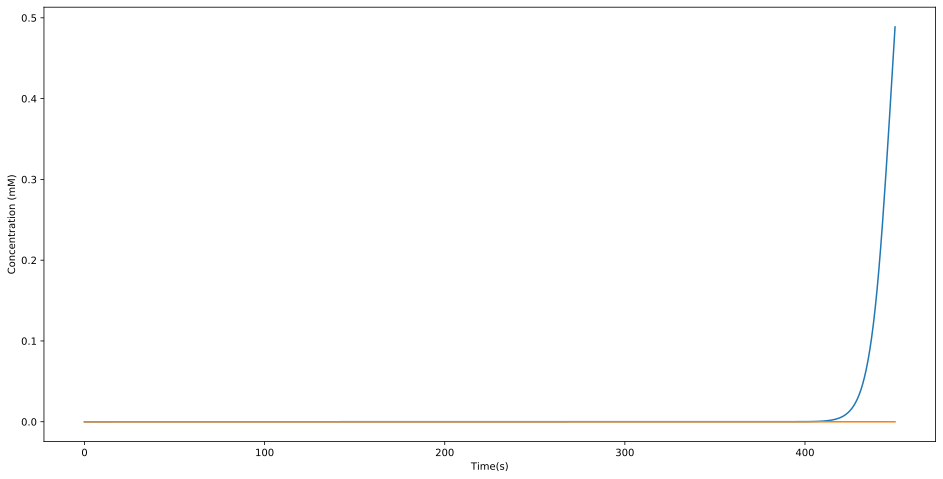

In [23]:
def simple_cycle(cycles = 1):
    #simple model
    example_dir_0 = lesson_4 / ("example_0_%s" % cycles)
    example_dir_0.mkdir(exist_ok = True)

    example0 = Cadet()

    #give a filename for where the simulation should be saved
    example0.filename = (example_dir_0 / 'example.h5').as_posix()

    #set the number of unit operations
    example0.root.input.model.nunits = 7

    #nswitches is the number of different ways the units are connected in this simulation
    #This is important for cyclic system and more complex setups
    example0.root.input.model.connections.nswitches = 3

    example0.root.input.model.connections.switch_000.section = 0
    example0.root.input.model.connections.switch_000.connections = [0, 5, -1, -1, 1.0e-6,
                                                                   5, 6, -1, -1, 1.0e-6,
                                                                   6, 3, -1, -1, 1.0e-6,
                                                                   1, 4, -1, -1, 1.0e-6,
                                                                   4, 2, -1, -1, 1.0e-6]

    example0.root.input.model.connections.switch_001.section = 1
    example0.root.input.model.connections.switch_001.connections = [0, 6, -1, -1, 1.0e-6,
                                                                   6, 4, -1, -1, 1.0e-6,
                                                                   4, 3, -1, -1, 1.0e-6,
                                                                   1, 5, -1, -1, 1.0e-6,
                                                                   5, 2, -1, -1, 1.0e-6]

    example0.root.input.model.connections.switch_002.section = 2
    example0.root.input.model.connections.switch_002.connections = [0, 4, -1, -1, 1.0e-6,
                                                                   4, 5, -1, -1, 1.0e-6,
                                                                   5, 3, -1, -1, 1.0e-6,
                                                                   1, 6, -1, -1, 1.0e-6,
                                                                   6, 2, -1, -1, 1.0e-6]

    #create an inlet
    example0.root.input.model.unit_000.unit_type = 'INLET'
    example0.root.input.model.unit_000.ncomp = 2
    example0.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

    #const_coeff + lin_coeff*t + quad_coeff*t^2 + cube_coeff*t^3
    example0.root.input.model.unit_000.sec_000.const_coeff = [1.0, 1.0]
    example0.root.input.model.unit_000.sec_000.lin_coeff = [0.0, 0.0]
    example0.root.input.model.unit_000.sec_000.quad_coeff = [0.0 ,0.0]
    example0.root.input.model.unit_000.sec_000.cube_coeff = [0.0, 0.0]

    example0.root.input.model.unit_001.unit_type = 'INLET'
    example0.root.input.model.unit_001.ncomp = 2
    example0.root.input.model.unit_001.inlet_type = 'PIECEWISE_CUBIC_POLY'

    #const_coeff + lin_coeff*t + quad_coeff*t^2 + cube_coeff*t^3
    example0.root.input.model.unit_001.sec_000.const_coeff = [0.0,0.0]
    example0.root.input.model.unit_001.sec_000.lin_coeff = [0.0,0.0]
    example0.root.input.model.unit_001.sec_000.quad_coeff = [0.0,0.0]
    example0.root.input.model.unit_001.sec_000.cube_coeff = [0.0,0.0]

    #create an outlet
    example0.root.input.model.unit_002.ncomp = 2
    example0.root.input.model.unit_002.unit_type = 'OUTLET'

    example0.root.input.model.unit_003.ncomp = 2
    example0.root.input.model.unit_003.unit_type = 'OUTLET'

    #create a column
    example0.root.input.model.unit_004.unit_type = 'LUMPED_RATE_MODEL_WITHOUT_PORES'
    example0.root.input.model.unit_004.ncomp = 2
    example0.root.input.model.unit_004.adsorption_model = 'MULTI_COMPONENT_LANGMUIR'
    example0.root.input.model.unit_004.init_c = [0.0,0.0]
    example0.root.input.model.unit_004.init_q = [0.0,0.0]
    example0.root.input.model.unit_004.col_dispersion = 4.7e-7
    example0.root.input.model.unit_004.col_length = 1.0
    example0.root.input.model.unit_004.total_porosity = 0.7
    example0.root.input.model.unit_004.velocity = 1
    example0.root.input.model.unit_004.cross_section_area = 4.523893421169302E-4

    example0.root.input.model.unit_004.adsorption.is_kinetic = 0
    example0.root.input.model.unit_004.adsorption.mcl_ka = [0.01, 0.02]
    example0.root.input.model.unit_004.adsorption.mcl_kd = [1.0, 1.0]
    example0.root.input.model.unit_004.adsorption.mcl_qmax = [100.0, 100.0]

    #discretization column settings
    example0.root.input.model.unit_004.discretization.ncol = 100
    example0.root.input.model.unit_004.discretization.nbound = [1,1]
    example0.root.input.model.unit_004.discretization.use_analytic_jacobian = 1

    example0.root.input.model.unit_005 = example0.root.input.model.unit_004.copy()
    example0.root.input.model.unit_006 = example0.root.input.model.unit_004.copy()

    #set what values get saved
    example0.root.input['return'].unit_002.write_solution_inlet = 1
    example0.root.input['return'].unit_002.write_solution_outlet = 1

    example0.root.input['return'].unit_003 = example0.root.input['return'].unit_002

    #automatically run the simulation in parallel
    example0.root.input.solver.nthreads = 0

    #set all the tolerances for the time integrator
    example0.root.input.solver.time_integrator.abstol = 1e-10
    example0.root.input.solver.time_integrator.algtol = 1e-10
    example0.root.input.solver.time_integrator.reltol = 1e-6
    example0.root.input.solver.time_integrator.init_step_size = 1e-6
    example0.root.input.solver.time_integrator.max_steps = 1000000

    #solver settings
    example0.root.input.solver.sections.nsec = 3 * cycles
    example0.root.input.solver.sections.section_times = numpy.linspace(0, 150 * 3 * cycles, example0.root.input.solver.sections.nsec + 1)
    example0.root.input.solver.sections.section_continuity = [0.0,] * (example0.root.input.solver.sections.nsec -1)

    #set the times that the simulator writes out data for
    example0.root.input.solver.user_solution_times = numpy.linspace(0, example0.root.input.solver.sections.section_times[-1], 
                                                                   int(example0.root.input.solver.sections.section_times[-1])+1)

    #default numeric settings
    numeric_default(example0)

    #save the simulation
    example0.save()

    #run the simulation
    data = example0.run()

    print(data)

    if data.returncode == 0:
        print("Simulation completed successfully")

        #load the data from the simulation so we can view the results
        example0.load()

        #plot the simulation
        plt.figure(figsize=[16,8])
        plt.plot(example0.root.output.solution.solution_times,
            example0.root.output.solution.unit_002.solution_outlet_comp_000)
        plt.plot(example0.root.output.solution.solution_times,
            example0.root.output.solution.unit_002.solution_outlet_comp_001)
        plt.xlabel('Time(s)')
        plt.ylabel('Concentration (mM)')


        plt.figure(figsize=[16,8])
        plt.plot(example0.root.output.solution.solution_times,
            example0.root.output.solution.unit_003.solution_outlet_comp_000)
        plt.plot(example0.root.output.solution.solution_times,
            example0.root.output.solution.unit_003.solution_outlet_comp_001)
        plt.xlabel('Time(s)')
        plt.ylabel('Concentration (mM)')

        #write the chromatogram data out to a csv file
        data = pandas.DataFrame([example0.root.output.solution.solution_times,
                            example0.root.output.solution.unit_001.solution_outlet_comp_000]).transpose()
        data.to_csv((example_dir_0 / 'example.csv').as_posix(), index=False, header=False)

    else:
        print("Simulation failed")
        
simple_cycle(1)

## Increase to 2 cycles

Lets look at the system after 2 cycles.

CompletedProcess(args=['C:/Users/kosh_000/CADET/cadet/bin/cadet-cli.exe', 'C:/Users/kosh_000/CADET/lessons/lesson_4/example_0_2/example.h5'], returncode=0, stdout=b'', stderr=b'')
Simulation completed successfully


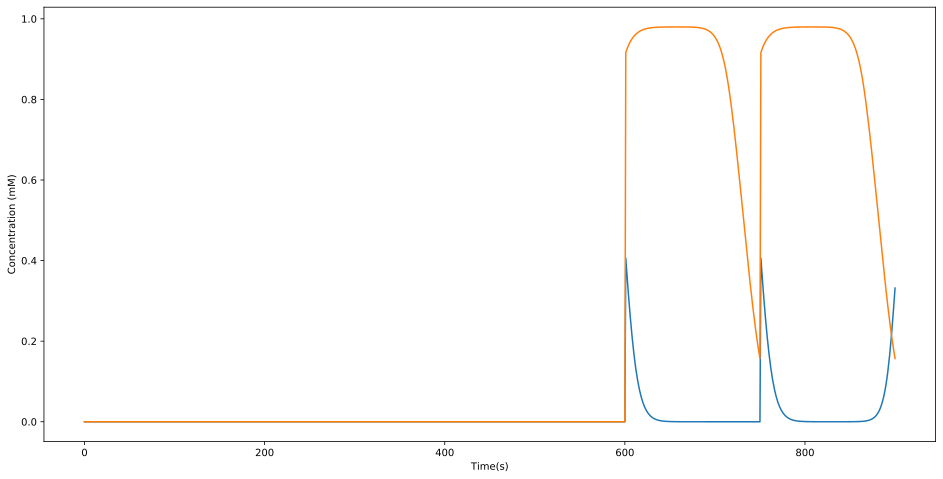

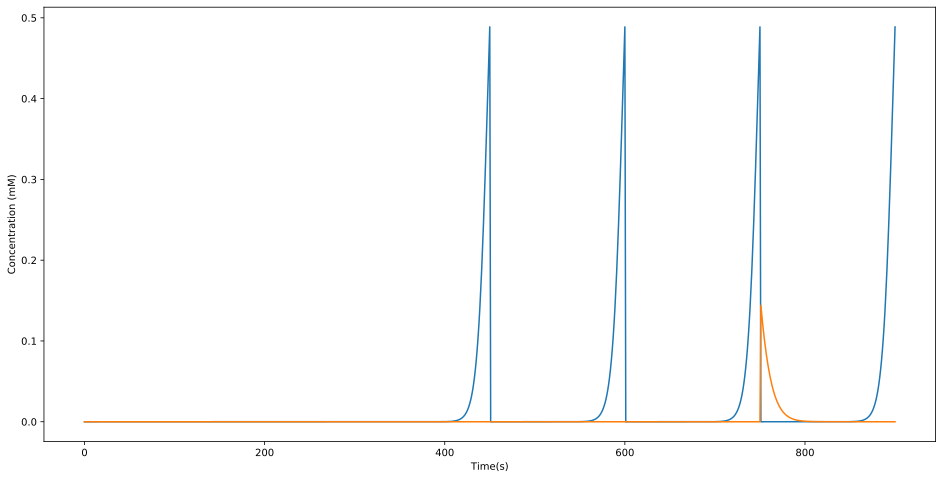

In [21]:
simple_cycle(2)

## Increase to 6 cycles

Increase to 6 cycles and lets see if we are at steady state.

CompletedProcess(args=['C:/Users/kosh_000/CADET/cadet/bin/cadet-cli.exe', 'C:/Users/kosh_000/CADET/lessons/lesson_4/example_0_6/example.h5'], returncode=0, stdout=b'', stderr=b'')
Simulation completed successfully


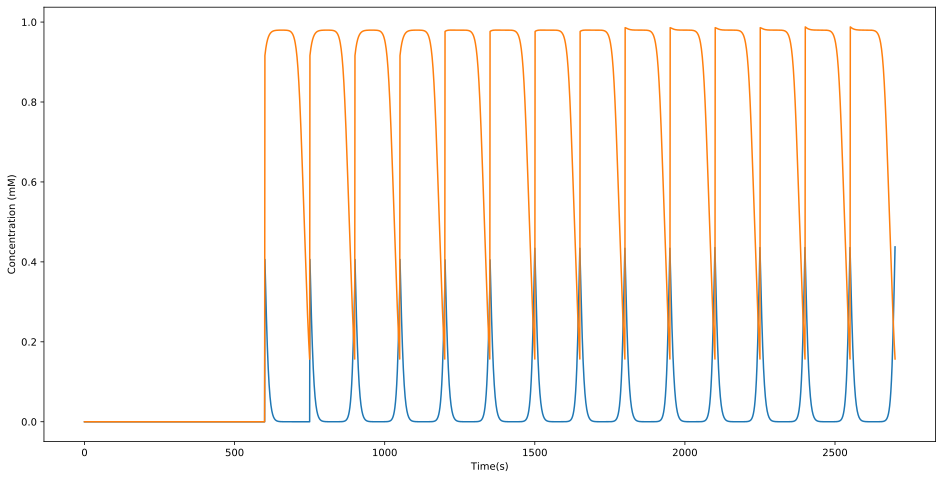

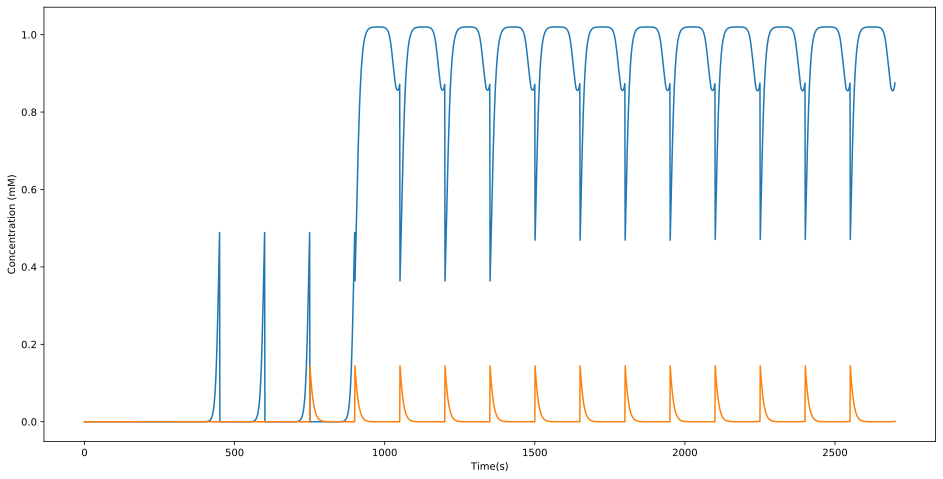

In [22]:
simple_cycle(6)

## Simulated Moving Bed (Cyclic Systems)

CADET can also simulate much more complex systems. We will briefly look over a simulated moving bed example. 

We will briefly look over how these systems are setup but won't go into it in detail.

Move to another lesson

CompletedProcess(args=['C:/Users/kosh_000/CADET/cadet/bin/cadet-cli.exe', 'C:/Users/kosh_000/CADET/lessons/lesson_4/example_1/example.h5'], returncode=0, stdout=b'', stderr=b'')
Simulation completed successfully


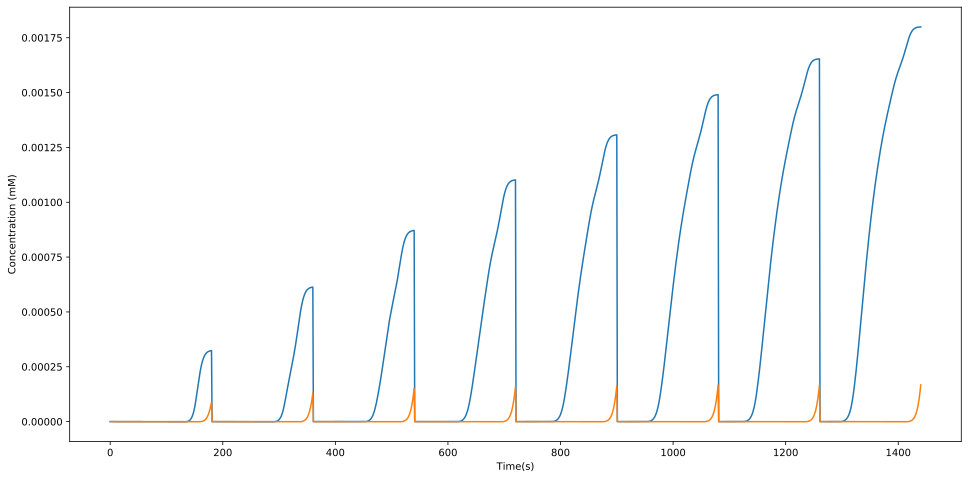

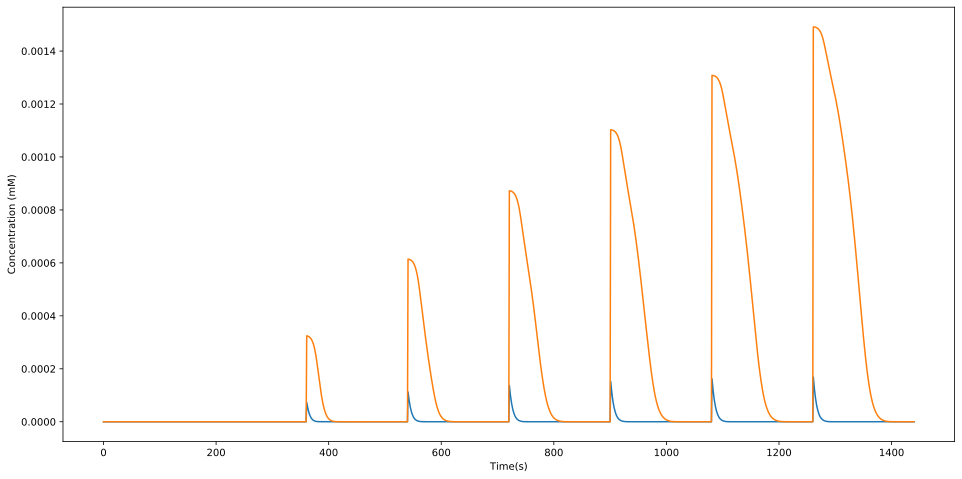

In [2]:
#cyclic systems

#simple model
example_dir_1 = lesson_4 / "example_1"
example_dir_1.mkdir(exist_ok = True)

example1 = Cadet()

#give a filename for where the simulation should be saved
example1.filename = (example_dir_1 / 'example.h5').as_posix()

#set the number of unit operations
example1.root.input.model.nunits = 8

#nswitches is the number of different ways the units are connected in this simulation
#This is important for cyclic system and more complex setups
example1.root.input.model.connections.nswitches = 4

example1.root.input.model.connections.switch_000.section = 0
example1.root.input.model.connections.switch_000.connections = [4, 5, -1, -1, 7.66e-7,
                                                          5, 6, -1, -1, 7.66e-7,
                                                          6, 7, -1, -1, 8.08e-7,
                                                          7, 4, -1, -1, 8.08e-7,
                                                          0, 4, -1, -1, 0.98e-7,
                                                          1, 6, -1, -1, 1.96e-7,
                                                          4, 2, -1, -1, 1.4e-7,
                                                          6, 3, -1, -1, 1.54e-7]

example1.root.input.model.connections.switch_001.section = 1
example1.root.input.model.connections.switch_001.connections = [4, 5, -1, -1, 8.08e-7,
                                                          5, 6, -1, -1, 7.66e-7,
                                                          6, 7, -1, -1, 7.66e-7,
                                                          7, 4, -1, -1, 8.08e-7,
                                                          0, 5, -1, -1, 0.98e-7,
                                                          1, 7, -1, -1, 1.96e-7,
                                                          5, 2, -1, -1, 1.4e-7,
                                                          7, 3, -1, -1, 1.54e-7]

example1.root.input.model.connections.switch_002.section = 2
example1.root.input.model.connections.switch_002.connections = [4, 5, -1, -1, 8.08e-7,
                                                          5, 6, -1, -1, 8.08e-7,
                                                          6, 7, -1, -1, 7.66e-7,
                                                          7, 4, -1, -1, 7.66e-7,
                                                          0, 6, -1, -1, 0.98e-7,
                                                          1, 4, -1, -1, 1.96e-7,
                                                          6, 2, -1, -1, 1.4e-7,
                                                          4, 3, -1, -1, 1.54e-7]

example1.root.input.model.connections.switch_003.section = 3
example1.root.input.model.connections.switch_003.connections = [4, 5, -1, -1, 7.66e-7,
                                                          5, 6, -1, -1, 8.08e-7,
                                                          6, 7, -1, -1, 8.08e-7,
                                                          7, 4, -1, -1, 7.66e-7,
                                                          0, 7, -1, -1, 0.98e-7,
                                                          1, 5, -1, -1, 1.96e-7,
                                                          7, 2, -1, -1, 1.4e-7,
                                                          5, 3, -1, -1, 1.54e-7]

#create an inlet
example1.root.input.model.unit_000.unit_type = 'INLET'
example1.root.input.model.unit_000.ncomp = 2
example1.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

#const_coeff + lin_coeff*t + quad_coeff*t^2 + cube_coeff*t^3
example1.root.input.model.unit_000.sec_000.const_coeff = [0.003,0.003]
example1.root.input.model.unit_000.sec_000.lin_coeff = [0.0,0.0]
example1.root.input.model.unit_000.sec_000.quad_coeff = [0.0,0.0]
example1.root.input.model.unit_000.sec_000.cube_coeff = [0.0,0.0]

example1.root.input.model.unit_000.sec_001.const_coeff = [0.003,0.003]
example1.root.input.model.unit_000.sec_001.lin_coeff = [0.0,0.0]
example1.root.input.model.unit_000.sec_001.quad_coeff = [0.0,0.0]
example1.root.input.model.unit_000.sec_001.cube_coeff = [0.0,0.0]

example1.root.input.model.unit_000.sec_002.const_coeff = [0.003,0.003]
example1.root.input.model.unit_000.sec_002.lin_coeff = [0.0,0.0]
example1.root.input.model.unit_000.sec_002.quad_coeff = [0.0,0.0]
example1.root.input.model.unit_000.sec_002.cube_coeff = [0.0,0.0]

example1.root.input.model.unit_000.sec_003.const_coeff = [0.003,0.003]
example1.root.input.model.unit_000.sec_003.lin_coeff = [0.0,0.0]
example1.root.input.model.unit_000.sec_003.quad_coeff = [0.0,0.0]
example1.root.input.model.unit_000.sec_003.cube_coeff = [0.0,0.0]



example1.root.input.model.unit_001.unit_type = 'INLET'
example1.root.input.model.unit_001.ncomp = 2
example1.root.input.model.unit_001.inlet_type = 'PIECEWISE_CUBIC_POLY'

#const_coeff + lin_coeff*t + quad_coeff*t^2 + cube_coeff*t^3
example1.root.input.model.unit_001.sec_000.const_coeff = [0.0,0.0]
example1.root.input.model.unit_001.sec_000.lin_coeff = [0.0,0.0]
example1.root.input.model.unit_001.sec_000.quad_coeff = [0.0,0.0]
example1.root.input.model.unit_001.sec_000.cube_coeff = [0.0,0.0]

example1.root.input.model.unit_001.sec_001.const_coeff = [0.0,0.0]
example1.root.input.model.unit_001.sec_001.lin_coeff = [0.0,0.0]
example1.root.input.model.unit_001.sec_001.quad_coeff = [0.0,0.0]
example1.root.input.model.unit_001.sec_001.cube_coeff = [0.0,0.0]

example1.root.input.model.unit_001.sec_002.const_coeff = [0.0,0.0]
example1.root.input.model.unit_001.sec_002.lin_coeff = [0.0,0.0]
example1.root.input.model.unit_001.sec_002.quad_coeff = [0.0,0.0]
example1.root.input.model.unit_001.sec_002.cube_coeff = [0.0,0.0]

example1.root.input.model.unit_001.sec_003.const_coeff = [0.0,0.0]
example1.root.input.model.unit_001.sec_003.lin_coeff = [0.0,0.0]
example1.root.input.model.unit_001.sec_003.quad_coeff = [0.0,0.0]
example1.root.input.model.unit_001.sec_003.cube_coeff = [0.0,0.0]

#create an outlet
example1.root.input.model.unit_002.ncomp = 2
example1.root.input.model.unit_002.unit_type = 'OUTLET'

example1.root.input.model.unit_003.ncomp = 2
example1.root.input.model.unit_003.unit_type = 'OUTLET'

#create a column
example1.root.input.model.unit_004.unit_type = 'LUMPED_RATE_MODEL_WITHOUT_PORES'
example1.root.input.model.unit_004.ncomp = 2
example1.root.input.model.unit_004.adsorption_model = 'LINEAR'
example1.root.input.model.unit_004.init_c = [0.0,0.0]
example1.root.input.model.unit_004.init_q = [0.0,0.0]
example1.root.input.model.unit_004.col_dispersion = 3.8148E-20
example1.root.input.model.unit_004.col_length = 0.25
example1.root.input.model.unit_004.total_porosity = 0.83
example1.root.input.model.unit_004.velocity = 1
example1.root.input.model.unit_004.cross_section_area = 3.141592653589793E-4

example1.root.input.model.unit_004.adsorption.is_kinetic = 0
example1.root.input.model.unit_004.adsorption.lin_ka = [5.72, 7.7]
example1.root.input.model.unit_004.adsorption.lin_kd = [1.0, 1.0]

#discretization column settings
example1.root.input.model.unit_004.discretization.ncol = 40
example1.root.input.model.unit_004.discretization.nbound = [1,1]
example1.root.input.model.unit_004.discretization.use_analytic_jacobian = 1

example1.root.input.model.unit_005 = example1.root.input.model.unit_004.copy()
example1.root.input.model.unit_006 = example1.root.input.model.unit_004.copy()
example1.root.input.model.unit_007 = example1.root.input.model.unit_004.copy()

#set what values get saved
example1.root.input['return'].unit_002.write_solution_inlet = 1
example1.root.input['return'].unit_002.write_solution_outlet = 1

example1.root.input['return'].unit_003 = example1.root.input['return'].unit_002

#automatically run the simulation in parallel
example1.root.input.solver.nthreads = 0

#set the times that the simulator writes out data for
example1.root.input.solver.user_solution_times = numpy.linspace(0, 1440, 1441)

#set all the tolerances for the time integrator
example1.root.input.solver.time_integrator.abstol = 1e-10
example1.root.input.solver.time_integrator.algtol = 1e-10
example1.root.input.solver.time_integrator.reltol = 1e-6
example1.root.input.solver.time_integrator.init_step_size = 1e-14
example1.root.input.solver.time_integrator.max_steps = 1000000

#solver settings
example1.root.input.solver.sections.nsec = 8
example1.root.input.solver.sections.section_times = [0.0, 180.0, 360.0, 540.0, 720.0,
                                               900.0, 1080.0, 1260.0, 1440.0]
example1.root.input.solver.sections.section_continuity = [0,0,0,0,0,0,0]

#default numeric settings
numeric_default(example1)

#save the simulation
example1.save()

#run the simulation
data = example1.run()

print(data)

if data.returncode == 0:
    print("Simulation completed successfully")
    
    #load the data from the simulation so we can view the results
    example1.load()
    
    #plot the simulation
    plt.figure(figsize=[16,8])
    plt.plot(example1.root.output.solution.solution_times,
        example1.root.output.solution.unit_002.solution_outlet_comp_000)
    plt.plot(example1.root.output.solution.solution_times,
        example1.root.output.solution.unit_002.solution_outlet_comp_001)
    plt.xlabel('Time(s)')
    plt.ylabel('Concentration (mM)')
    
    
    plt.figure(figsize=[16,8])
    plt.plot(example1.root.output.solution.solution_times,
        example1.root.output.solution.unit_003.solution_outlet_comp_000)
    plt.plot(example1.root.output.solution.solution_times,
        example1.root.output.solution.unit_003.solution_outlet_comp_001)
    plt.xlabel('Time(s)')
    plt.ylabel('Concentration (mM)')
    
    #write the chromatogram data out to a csv file
    data = pandas.DataFrame([example1.root.output.solution.solution_times,
                        example1.root.output.solution.unit_001.solution_outlet_comp_000]).transpose()
    data.to_csv((example_dir_1 / 'example.csv').as_posix(), index=False, header=False)
    
else:
    print("Simulation failed")

## Creating larger SMB systems

If you want to create large SMB or other cyclic systems it is best to start automating parts of the model creation. You don't want to deal with all the flows and columns by hand since that also increases the chances of making a mistake.

In [3]:
def gen_connections(units, cycle_size, size, step, flows, flows_static):
    temp = []
    connections = list(zip(units, numpy.roll(units,-1), flows))
    io = numpy.roll(units, step)[[0, size*2, size-1, size*3-1]]
    ios = list(zip([0, 1, 2, 3], io))

    for connection in connections:
        temp.append([connection[0], connection[1], -1, -1, connection[2]])
    #inputs
    idx = 0
    for io in ios[:2]:
        temp.append([io[0], io[1], -1, -1, flows_static[idx]])
        idx+=1;
    #outputs
    for io in ios[2:]:
        temp.append([io[1], io[0], -1, -1, flows_static[idx]])
        idx+=1;
    return numpy.array(temp)

def expand_flow(seq, inlet1, inlet2, number):
    "expand the flows for smb, this is more complex since we need link values"
    temp = []
    temp.extend([seq[3] + inlet1] * (number-1))
    temp.append(seq[0])

    temp.extend([seq[0]] * (number-1))
    temp.append(seq[1])

    temp.extend([seq[1] + inlet2] * (number-1))
    temp.append(seq[2])

    temp.extend([seq[2]] * (number-1))
    temp.append(seq[3])

    return temp

In [4]:
def large_smb(cycle_size=4, cycles=2):
    #number of times flows have to be expanded for a 4-zone model
    repeat_size = int(cycle_size/4)

    #simple model
    example1_dir = lesson_4 / ("example_1_%s_%s" % (cycle_size, cycles))
    example1_dir.mkdir(exist_ok = True)

    example1 = Cadet()

    #give a filename for where the simulation should be saved
    example1.filename = (example1_dir / 'example.h5').as_posix()


    example1.root.input.model.nunits = 4 + cycle_size

    example1.root.input.model.solver.gs_type = 1
    example1.root.input.model.solver.max_krylov = 0
    example1.root.input.model.solver.max_restarts = 0
    example1.root.input.model.solver.schur_safety = 1e-8


    #setup connections
    example1.root.input.model.connections.nswitches = cycle_size

    units = range(4, 4+cycle_size)

    flows = expand_flow([7.66E-07, 7.66E-07, 8.08E-07, 8.08E-07], 0.98e-7, 1.96e-07, repeat_size)
    flows_static = numpy.array([0.98e-7, 1.96e-7, 1.4e-7, 1.54e-7])

    for i in range(cycle_size):
        example1.root.input.model.connections["switch_%03d" % i].section = i
        example1.root.input.model.connections["switch_%03d" % i].connections = gen_connections(units, cycle_size, repeat_size, -i, numpy.array(list(numpy.roll(flows, i))), flows_static )

    #setup inlets
    example1.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'
    example1.root.input.model.unit_000.ncomp = 2
    example1.root.input.model.unit_000.unit_type = 'INLET'

    for i in range(cycle_size):
        #section
        example1.root.input.model.unit_000["sec_%03d" % i].const_coeff = [0.55/180.16, 0.55/180.16]
        example1.root.input.model.unit_000["sec_%03d" % i].lin_coeff = [0.0, 0.0]
        example1.root.input.model.unit_000["sec_%03d" % i].quad_coeff = [0.0, 0.0]
        example1.root.input.model.unit_000["sec_%03d" % i].cube_coeff = [0.0, 0.0]

    example1.root.input.model.unit_001.inlet_type = 'PIECEWISE_CUBIC_POLY'
    example1.root.input.model.unit_001.ncomp = 2
    example1.root.input.model.unit_001.unit_type = 'INLET'

    for i in range(cycle_size):
        #section
        example1.root.input.model.unit_001["sec_%03d" % i].const_coeff = [0.0, 0.0]
        example1.root.input.model.unit_001["sec_%03d" % i].lin_coeff = [0.0, 0.0]
        example1.root.input.model.unit_001["sec_%03d" % i].quad_coeff = [0.0, 0.0]
        example1.root.input.model.unit_001["sec_%03d" % i].cube_coeff = [0.0, 0.0]

    #create columns
    for unit in range(4, 4 + cycle_size):

        example1.root.input.model["unit_%03d" % unit].unit_type = 'LUMPED_RATE_MODEL_WITHOUT_PORES'

        col = example1.root.input.model["unit_%03d" % unit]

        col.ncomp = 2
        col.adsorption_model = 'LINEAR'
        col.init_c = [0.0,0.0]
        col.init_q = [0.0,0.0]
        col.col_dispersion = 3.8148E-20
        col.col_length = 0.25/repeat_size
        col.total_porosity = 0.83
        col.velocity = 1
        col.cross_section_area = 3.141592653589793E-4

        col.adsorption.is_kinetic = 0
        col.adsorption.lin_ka = [5.72, 7.7]
        col.adsorption.lin_kd = [1.0, 1.0]

        col.discretization.gs_type = 1
        col.discretization.max_krylov = 0
        col.discretization.max_restarts = 0
        col.discretization.nbound = [1, 1]
        col.discretization.ncol = max(int(40/repeat_size), 3)
        col.discretization.use_analytic_jacobian = 1

    #create outlets
    example1.root.input.model.unit_002.ncomp = 2
    example1.root.input.model.unit_002.unit_type = 'OUTLET'

    example1.root.input.model.unit_003.ncomp = 2
    example1.root.input.model.unit_003.unit_type = 'OUTLET'

    #create output information

    example1.root.input['return'].write_solution_times = 1

    ret = example1.root.input['return']

    ret.unit_002.write_solution_column_inlet = 1
    ret.unit_002.write_solution_column_outlet = 1

    ret.unit_003.write_solution_column_inlet = 1
    ret.unit_003.write_solution_column_outlet = 1

    example1.root.input.solver.nthreads = 0
    example1.root.input.solver.user_solution_times = numpy.linspace(0, cycles*180*4, 1000*cycle_size*cycles)
    example1.root.input.solver.sections.nsec = cycle_size*cycles
    example1.root.input.solver.sections.section_continuity = [0] * (cycle_size*cycles -1)
    example1.root.input.solver.sections.section_times = [float(i) * 180*4.0/cycle_size for i in range(cycle_size*cycles+1)]

    example1.root.input.solver.time_integrator.abstol = 1e-10
    example1.root.input.solver.time_integrator.algtol = 1e-10
    example1.root.input.solver.time_integrator.init_step_size = 1e-14
    example1.root.input.solver.time_integrator.max_steps = 1e6
    example1.root.input.solver.time_integrator.reltol = 1e-6

    #default numeric settings
    numeric_default(example1)

    #save the simulation
    example1.save()

    #run the simulation
    data = example1.run()

    print(data)

    if data.returncode == 0:
        print("Simulation completed successfully")

        #load the data from the simulation so we can view the results
        example1.load()

        #plot the simulation
        plt.figure(figsize=[16,8])
        plt.plot(example1.root.output.solution.solution_times,
            example1.root.output.solution.unit_002.solution_outlet_comp_000)
        plt.plot(example1.root.output.solution.solution_times,
            example1.root.output.solution.unit_002.solution_outlet_comp_001)
        plt.xlabel('Time(s)')
        plt.ylabel('Concentration (mM)')


        plt.figure(figsize=[16,8])
        plt.plot(example1.root.output.solution.solution_times,
            example1.root.output.solution.unit_003.solution_outlet_comp_000)
        plt.plot(example1.root.output.solution.solution_times,
            example1.root.output.solution.unit_003.solution_outlet_comp_001)
        plt.xlabel('Time(s)')
        plt.ylabel('Concentration (mM)')

        #write the chromatogram data out to a csv file
        data = pandas.DataFrame([example1.root.output.solution.solution_times,
                            example1.root.output.solution.unit_001.solution_outlet_comp_000]).transpose()
        data.to_csv((example1_dir / 'example_comp0.csv').as_posix(), index=False, header=False)
        
        data = pandas.DataFrame([example1.root.output.solution.solution_times,
                            example1.root.output.solution.unit_001.solution_outlet_comp_001]).transpose()
        data.to_csv((example1_dir / 'example_comp1.csv').as_posix(), index=False, header=False)

    else:
        print("Simulation failed")

## Running larger systems

Now that we have function to create larger SMB systems we can easily make systems with far more columns in them until they approxiate a true moving bed.

CompletedProcess(args=['C:/Users/kosh_000/CADET/cadet/bin/cadet-cli.exe', 'C:/Users/kosh_000/CADET/lessons/lesson_4/example_1_4_2/example.h5'], returncode=0, stdout=b'', stderr=b'')
Simulation completed successfully


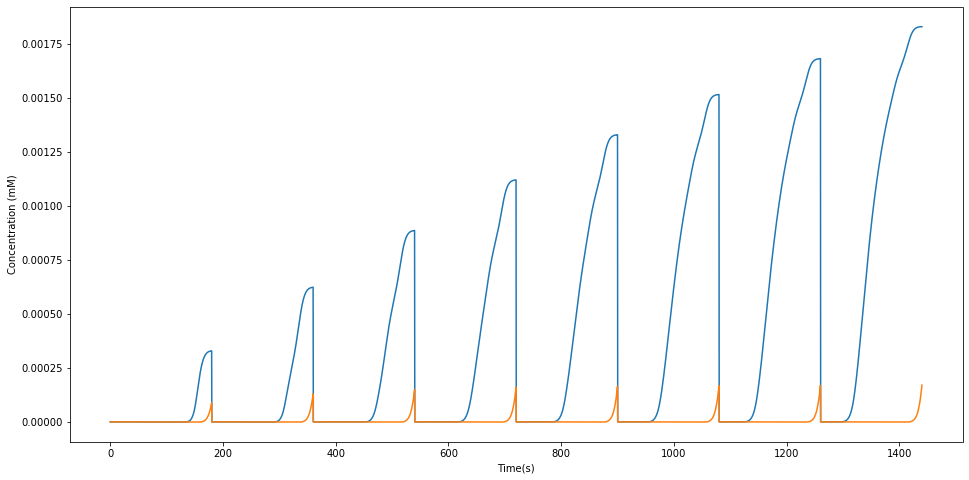

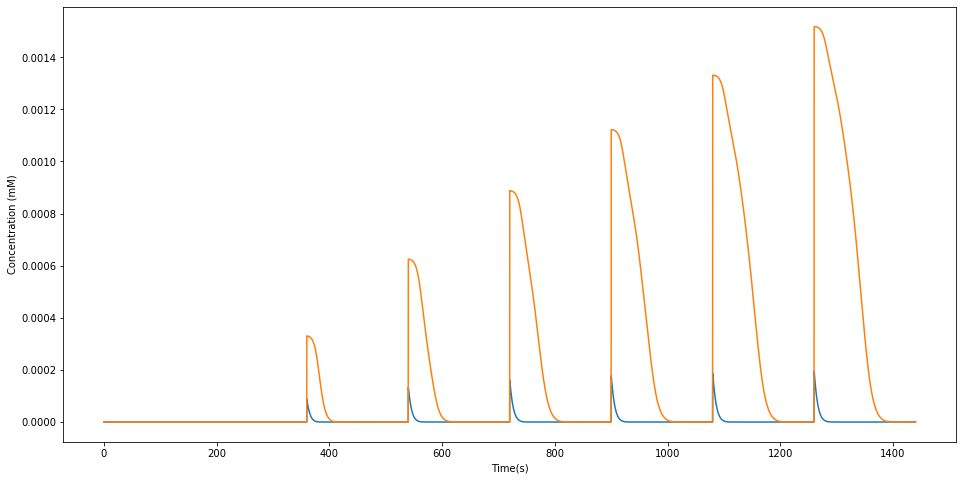

In [5]:
large_smb(4,2)

CompletedProcess(args=['C:/Users/kosh_000/CADET/cadet/bin/cadet-cli.exe', 'C:/Users/kosh_000/CADET/lessons/lesson_4/example_1_4_20/example.h5'], returncode=0, stdout=b'', stderr=b'')
Simulation completed successfully


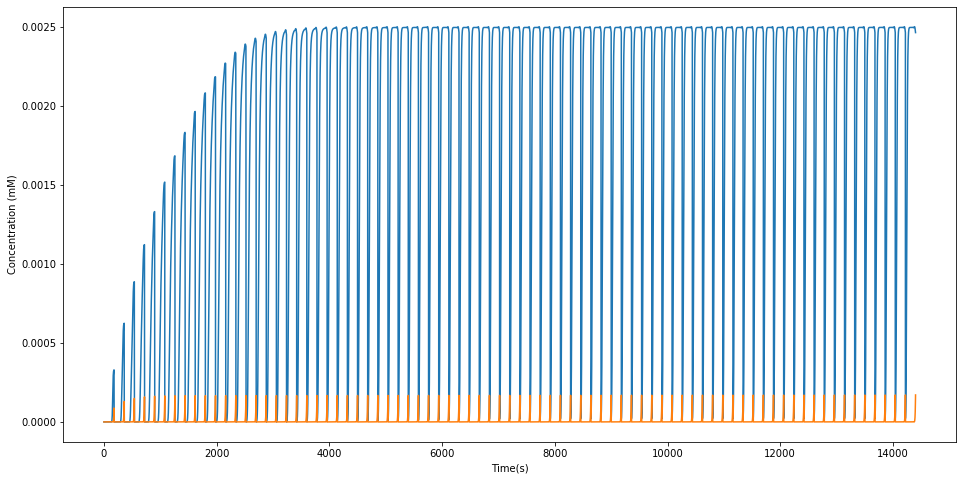

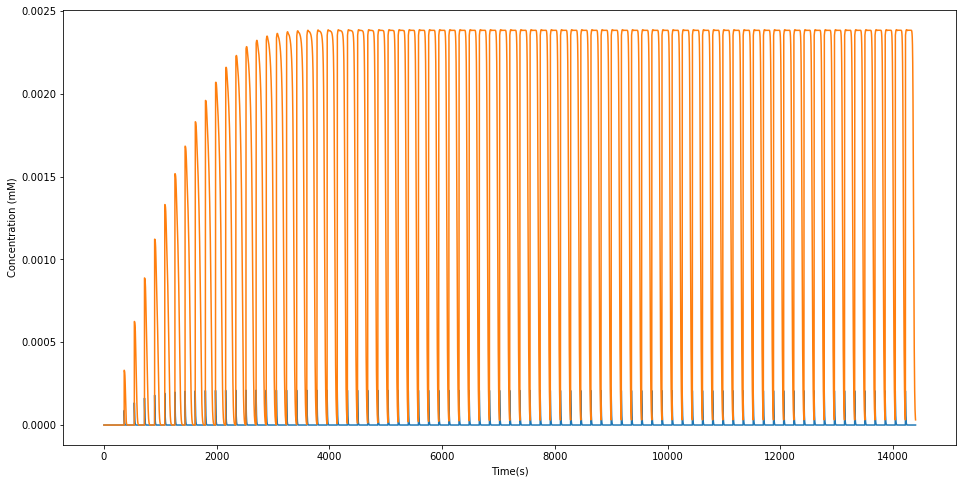

In [6]:
large_smb(4,20)

CompletedProcess(args=['C:/Users/kosh_000/CADET/cadet/bin/cadet-cli.exe', 'C:/Users/kosh_000/CADET/lessons/lesson_4/example_1_16_20/example.h5'], returncode=0, stdout=b'', stderr=b'')
Simulation completed successfully


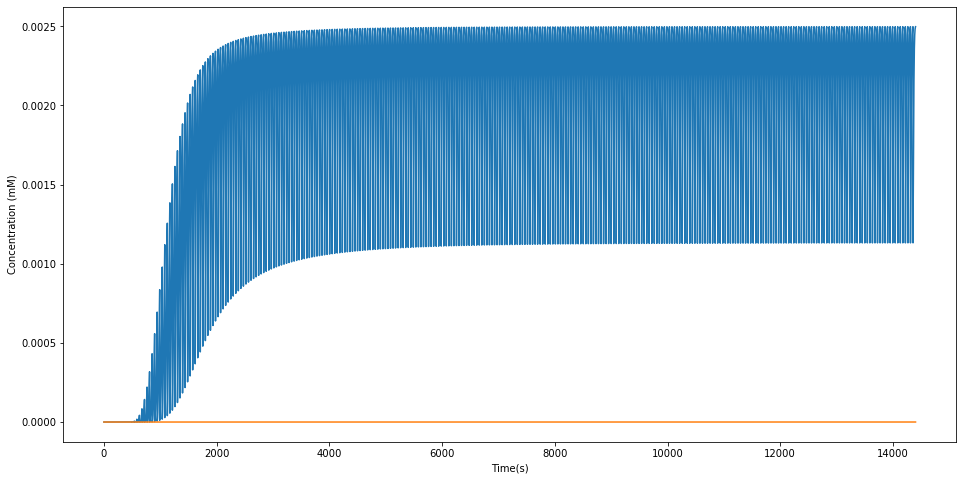

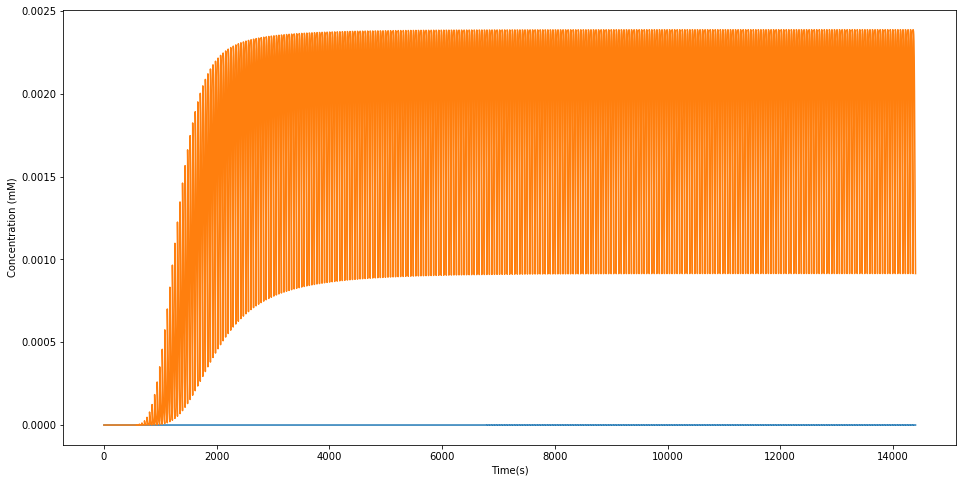

In [7]:
large_smb(16, 20)

CompletedProcess(args=['C:/Users/kosh_000/CADET/cadet/bin/cadet-cli.exe', 'C:/Users/kosh_000/CADET/lessons/lesson_4/example_1_64_20/example.h5'], returncode=0, stdout=b'', stderr=b'')
Simulation completed successfully


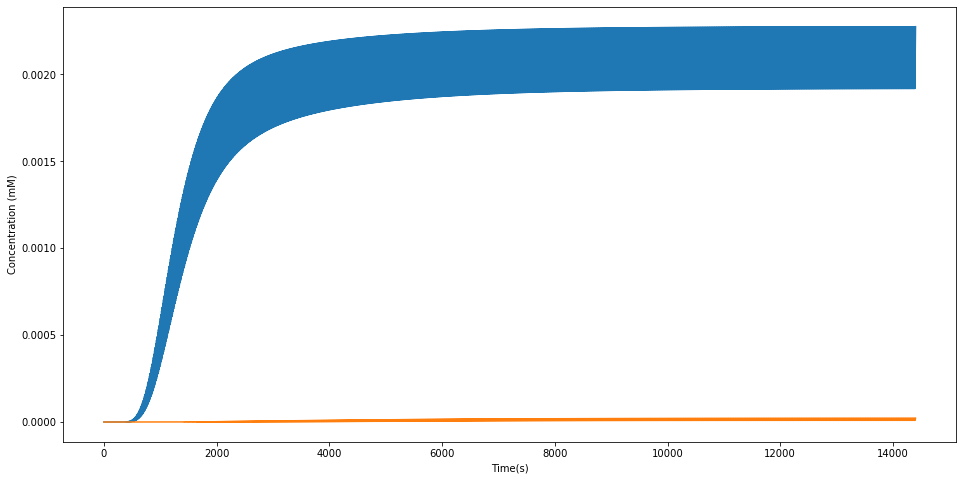

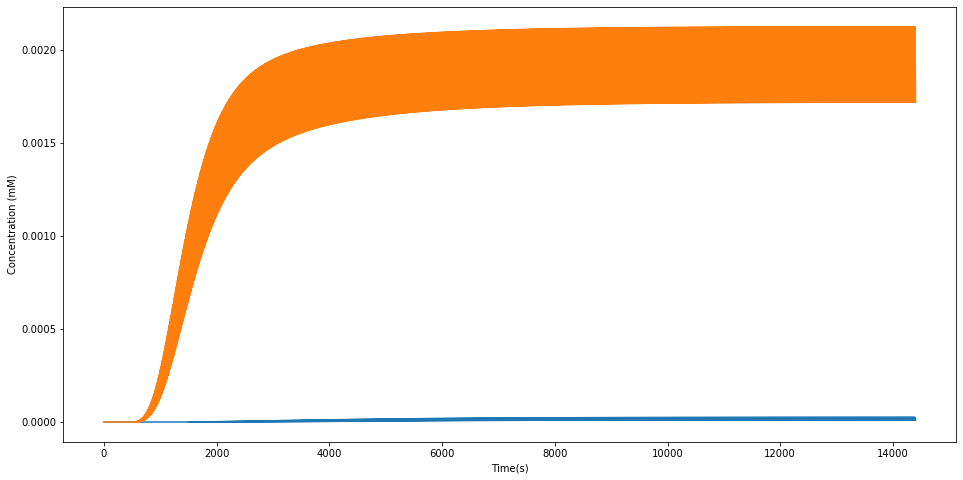

In [8]:
large_smb(64, 20)

CompletedProcess(args=['C:/Users/kosh_000/CADET/cadet/bin/cadet-cli.exe', 'C:/Users/kosh_000/CADET/lessons/lesson_4/example_1_256_20/example.h5'], returncode=0, stdout=b'', stderr=b'')
Simulation completed successfully


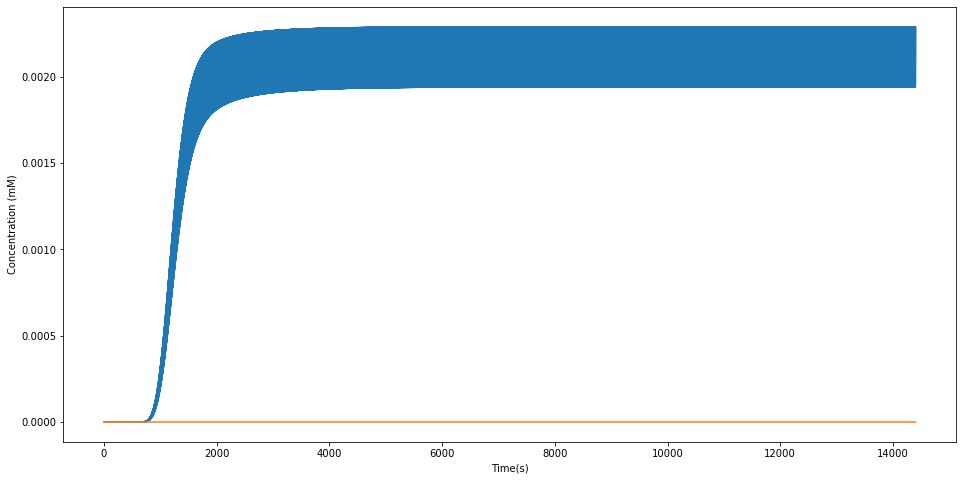

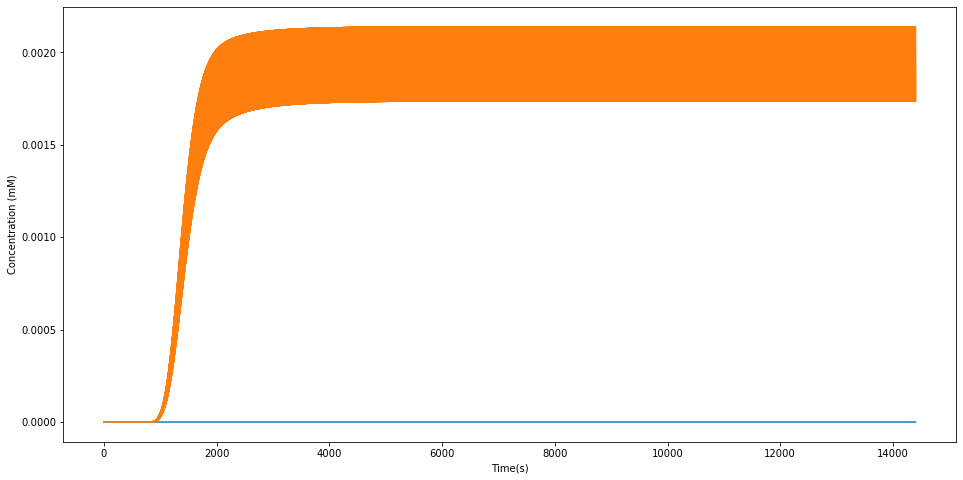

In [9]:
large_smb(256, 20)